# **Grover’s Algorithm**

In [1]:
import matplotlib.pyplot as plot
import numpy as nump
import string
import hashlib
from math import sqrt, pi
from collections import OrderedDict
from statistics import mean

In [2]:
def RenderGraph(amplitude_value, n):
    y_position = nump.arange(n)
    plot.bar(y_position, amplitude_value.values(), align='center', color='g')
    plot.xticks(y_position, amplitude_value.keys())
    plot.ylabel('Amplitude Value')
    plot.title('Grovers Algorithm')
    plot.show()

In [3]:
def ApplyOracleFunction(xvalue):
    return hashlib.sha256(bytes(xvalue, 'utf-8')).hexdigest()

In [4]:
def ApplyGroverAlgorithm(target, objects, nvalue, rounds):
    y_pos = nump.arange(nvalue)
    amplitude = OrderedDict.fromkeys(objects, 1/sqrt(nvalue))

    for i in range(0, rounds, 2):
        for k, v in amplitude.items():
            if ApplyOracleFunction(k) == target:
                amplitude[k] = v * -1

        average = mean(amplitude.values())
        for k, v in amplitude.items():
            if ApplyOracleFunction(k) == target:
                amplitude[k] = (2 * average) + abs(v)
                continue
            amplitude[k] = v-(2*(v-average))
    return amplitude

In [5]:
target_algorithm = '9'
objects_grover = ('14', '5', '13', '7','9','11','97')
number = len(objects_grover)
amplitude_grover = OrderedDict.fromkeys(objects_grover, 1/sqrt(number))

In [6]:
amplitude_grover[target_algorithm] = amplitude_grover[target_algorithm] * -1
print(amplitude_grover)
average_grover = mean(amplitude_grover.values())
print("Mean is {}".format(average_grover))
for k, v in amplitude_grover.items():
    if k == target_algorithm:
        amplitude_grover[k] = (2 * average_grover) + abs(v)
        continue
    amplitude_grover[k] = v-(2*(v-average_grover))
print(amplitude_grover)

OrderedDict([('14', 0.3779644730092272), ('5', 0.3779644730092272), ('13', 0.3779644730092272), ('7', 0.3779644730092272), ('9', -0.3779644730092272), ('11', 0.3779644730092272), ('97', 0.3779644730092272)])
Mean is 0.26997462357801943
OrderedDict([('14', 0.16198477414681167), ('5', 0.16198477414681167), ('13', 0.16198477414681167), ('7', 0.16198477414681167), ('9', 0.9179137201652661), ('11', 0.16198477414681167), ('97', 0.16198477414681167)])


number of rounds are 4


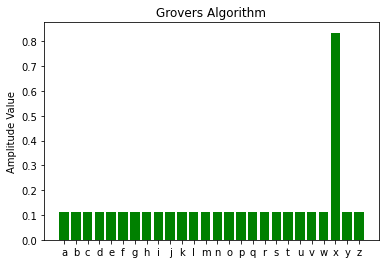

In [7]:
needle_value = "2d711642b726b04401627ca9fbac32f5c8530fb1903cc4db02258717921a4881"
haystack_value = string.ascii_lowercase
num = len(haystack_value)
num_rounds = int((pi / 4) * sqrt(num))
print("number of rounds are {}".format(num_rounds))
RenderGraph(ApplyGroverAlgorithm(needle_value, haystack_value, num, num_rounds), num)